In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix

In [2]:
# Load dataset
df = pd.read_csv('Dataset/PCA_adult.csv')

In [3]:
features = df.drop(columns=['income']) 
label = df['income'] #predict 

In [4]:
# Split the dataset into training(80%) and testing(20%) sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)

In [5]:
X_train.shape

(36140, 10)

In [6]:
X_test.shape

(9035, 10)

# Model Training

In [7]:
model = GaussianNB()

# Grid search
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=1000)
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy score found: ", grid_search.best_score_)

Best parameters found:  {'var_smoothing': 0.7796360130405233}
Best accuracy score found:  0.7992805755395683


In [8]:
# Training the Naive Bayes Model with the best parameters
best_params_ = grid_search.best_params_
nb_model = GaussianNB(**best_params_)
nb_model.fit(X_train, y_train)

GaussianNB(var_smoothing=0.7796360130405233)

# Model Testing

In [9]:
# Make predictions on the test data
predictions = nb_model.predict(X_test)

In [10]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8042058660763697


In [11]:
# Generate Classification Report
report = classification_report(y_test, predictions)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.98      0.88      6830
           1       0.82      0.26      0.39      2205

    accuracy                           0.80      9035
   macro avg       0.81      0.62      0.64      9035
weighted avg       0.81      0.80      0.76      9035



In [12]:
# Predict class labels on the training dataset
y_train_pred_nb = nb_model.predict(X_train)

# Predict class labels on the testing dataset
y_test_pred_nb = nb_model.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, y_train_pred_nb)
print(f'\nTraining Accuracy: {train_accuracy:.2f}')

# Calculate testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred_nb)
print(f'Testing Accuracy: {test_accuracy:.2f}')


Training Accuracy: 0.80
Testing Accuracy: 0.80


# Model Testing Visualization

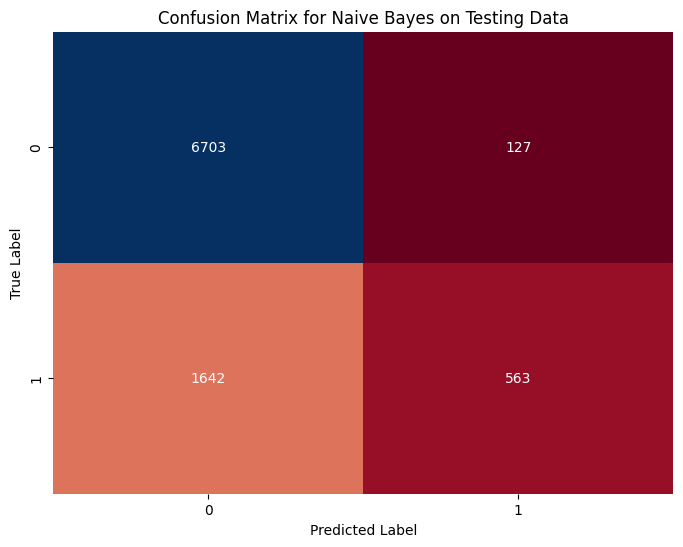

In [13]:
# Get the confusion matrix
confusion_matrix_nb = confusion_matrix(y_test, predictions)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_nb, annot=True, fmt='d', cmap='RdBu', cbar=False,
            xticklabels=nb_model.classes_,
            yticklabels=nb_model.classes_)
plt.title('Confusion Matrix for Naive Bayes on Testing Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

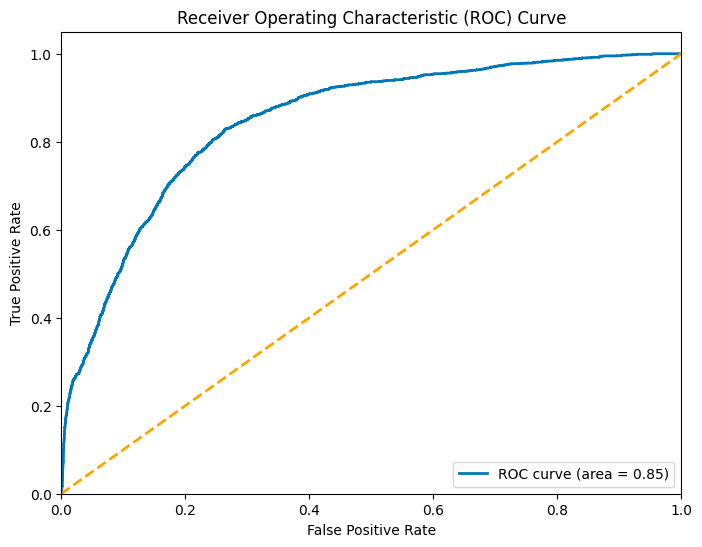

In [14]:
y_true = y_test
y_scores = nb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Compute ROC area under the curve
roc_auc = roc_auc_score(y_true, y_scores)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='#0077b6', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [15]:
# Save model to pickle file
import pickle
pickle.dump(nb_model, open('Models/nb_model.pickle','wb'))